# Convolutional Neural Networks with Theano and Lasagne

## Sample work by Pablo Campos Viana

This example deals with recognition of digits represented by 16x16 images. This demonstration is derived from the examples of Lasagne that can be found when installing it.

### Data wrangling

We load the data into a Pandas data frame. The data were extracted from the ElemStatLearn package of R.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams


import pandas as pd
pd.options.display.max_rows = 10


df_train = pd.read_csv('zip_train.csv', sep=',')
df_test = pd.read_csv('zip_test.csv', sep=',')
print df_train.shape
print df_test.shape
df_train

(7291, 257)
(2007, 257)


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257
0,6,-1,-1,-1,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1
1,5,-1,-1,-1,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1
2,4,-1,-1,-1,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1
3,7,-1,-1,-1,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1
4,3,-1,-1,-1,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286,3,-1,-1,-1,-0.988,-0.527,-0.208,0.620,1.000,0.467,...,-0.116,0.899,0.416,-0.510,-1.000,-1.000,-1.000,-1.000,-1.000,-1
7287,3,-1,-1,-1,-0.990,0.708,0.557,0.347,-0.107,-0.758,...,0.697,0.636,0.167,-0.968,-1.000,-1.000,-1.000,-1.000,-1.000,-1
7288,3,-1,-1,-1,-0.783,-0.984,-0.827,0.068,1.000,1.000,...,0.805,1.000,1.000,0.727,-0.342,-0.933,-1.000,-1.000,-1.000,-1
7289,0,-1,-1,-1,-1.000,-1.000,-0.549,0.463,0.999,0.999,...,-0.231,0.621,0.999,-0.042,-0.231,-0.687,-1.000,-1.000,-1.000,-1


We extract the columns with the intensities of the pixels and convert them into vectors of numpy, and we also extract the labels:

In [2]:
x_train_1 = np.float32(df_train.iloc[:,1:257].values)
x_test_1 = np.float32(df_test.iloc[:,1:257].values)
y_train = np.int32(df_train['X1'])
y_test = np.int32(df_test['X1'])

print x_train_1.shape
print x_train_1
print y_train

(7291, 256)
[[-1.         -1.         -1.         ..., -1.         -1.         -1.        ]
 [-1.         -1.         -1.         ..., -0.671      -0.82800001 -1.        ]
 [-1.         -1.         -1.         ..., -1.         -1.         -1.        ]
 ..., 
 [-1.         -1.         -1.         ..., -1.         -1.         -1.        ]
 [-1.         -1.         -1.         ..., -1.         -1.         -1.        ]
 [-1.         -1.         -1.         ..., -1.         -1.         -1.        ]]
[6 5 4 ..., 3 0 1]


Now we plot the data. Note that in this example we fill dark pixels around the image. We do this in order to be able to do 5x5 convolution over all pixels of the image to make convolutions that cover all pixels in all possible positions:

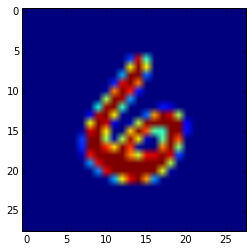

6


In [3]:
%matplotlib inline
plt.imshow(np.lib.pad(x_train_1[0,].reshape(16,16), (6,6), mode='constant', constant_values=-1))
plt.show()
print y_train[0]

Here we pad the images, and convert them to matrices of 16x16. Note that now the training and test sets are 4-dimensional arrays (number of cases, 1, high image, image width). If they were color images the second dimension would be size 3 instead of 1.

In [4]:
n_pad = 6
x_train = np.pad(x_train_1.reshape(x_train_1.shape[0], 1, 16, 16), 
                 ((0,0),(0,0),(n_pad,n_pad),(n_pad,n_pad)), mode='constant', constant_values=-1)
x_test = np.pad(x_test_1.reshape(x_test_1.shape[0], 1, 16, 16), 
                ((0,0),(0,0),(n_pad,n_pad),(n_pad,n_pad)), mode='constant', constant_values=-1)

print x_train[5][0].shape
print x_train.shape
print x_test.shape
#x_train[5][0]

(28, 28)
(7291, 1, 28, 28)
(2007, 1, 28, 28)


We need a function to iterate over the data in mini-batches. This function is an iterator:

In [5]:
def iterar_minilotes(entradas, respuesta, n_lote, mezclar):
    if mezclar:
        indices = np.arange(len(entradas))
        np.random.shuffle(indices)
    for i in range(0, len(entradas) - n_lote + 1, n_lote):
        if mezclar:
            parte = indices[i:i + n_lote]
        else:
            parte = slice(i, i + n_lote)
        yield entradas[parte], respuesta[parte]

In [6]:
it = iterar_minilotes(x_train, y_train, 6, mezclar = True)
a,b = it.next()
print b
a,b = it.next()
print b
a,b = it.next()
print b

for a,b in it:
    pass


[5 0 8 8 2 6]
[0 7 8 4 1 6]
[5 7 7 6 1 3]


 ### Network architecture
 
The code that follows is derived from the [examples of Lasagne] (https://github.com/Lasagne/Lasagne/blob/master/examples/mnist.py). We load the libraries we need.

In [7]:
import lasagne
from lasagne import layers
from lasagne.nonlinearities import  softmax, rectify, sigmoid
import theano
import theano.tensor as T
from lasagne.regularization import regularize_layer_params_weighted, l2

We define variables for the size of the input data and for the batch size:

In [8]:
im_ancho = 16 + 2*n_pad
im_alto = 16 + 2*n_pad

In [9]:
n_lote=400

We now define the architecture of the network, which in this first example has:

1. a convolution layer with 8 filters,
2. a layer of max pooling, then
3. a convolution layer with 30 filters,
4. a layer of max pooling,
5. a hidden layer fully connected with 100 units, and finally
6. the output layer that is fully connected:

In [10]:
entrada_var = T.tensor4('entradas')
respuesta_var = T.ivector('respuesta')

# Set the seed

np.random.seed(108783)

capa_entrada = layers.InputLayer((n_lote, 1, im_ancho, im_alto), entrada_var)

capa_conv_1 = layers.Conv2DLayer(
    capa_entrada,
    num_filters = 4,
    filter_size = (5,5),
    nonlinearity = rectify)

capa_pool_1 = layers.MaxPool2DLayer(
    capa_conv_1,
    pool_size = (2,2)
)

capa_conv_2 = layers.Conv2DLayer(
    capa_pool_1,
    num_filters = 10,
    filter_size = (5,5),
    nonlinearity = rectify
)

capa_pool_2 = layers.MaxPool2DLayer(
    capa_conv_2,
    pool_size = (2,2)
)

capa_salida = layers.DenseLayer(
    capa_pool_2,
    num_units = 10,
    nonlinearity = softmax
)

The network has the following number of parameters:

In [11]:
print layers.count_params(capa_salida)
print capa_conv_1.W.get_value().shape
print capa_conv_2.W.get_value().shape
print capa_salida.W.get_value().shape

2724
(4, 1, 5, 5)
(10, 4, 5, 5)
(160, 10)


Visualization of the initialization of the first layer

(4, 1, 5, 5)
[[ 0.0565251  -0.08251839  0.17667115 -0.02756546 -0.05157032]
 [ 0.09568525 -0.1842831  -0.03519461  0.16370482 -0.12729171]
 [-0.03877953 -0.07344629  0.07368634  0.12570551  0.04015345]
 [ 0.19305865 -0.15716614 -0.17324495 -0.04129327  0.14976537]
 [-0.21790075 -0.02240178  0.01623938  0.0571516   0.17978525]]


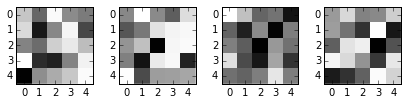

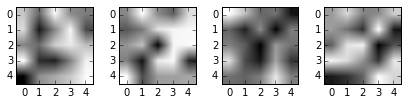

In [12]:
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec

pesos_1 = capa_conv_1.W.get_value()
pesos_2 =  capa_conv_2.W.get_value()
print pesos_1.shape
print pesos_1[0,0,:,:]

fig  = plt.figure()
num_filt_1 = pesos_1.shape[0]
gs = gridspec.GridSpec(1, num_filt_1)
ax = [plt.subplot(gs[i]) for i in range(num_filt_1)]
gs.update(hspace=0)
gs.tight_layout(fig, h_pad=-2.0,w_pad=0.0)
for i in range(num_filt_1):
    ax[i].imshow(pesos_1[i,0,:,:], cmap = cm.Greys_r,  interpolation = 'none')
fig  = plt.figure()
num_filt_1 = pesos_1.shape[0]
gs = gridspec.GridSpec(1, num_filt_1)
ax = [plt.subplot(gs[i]) for i in range(num_filt_1)]
gs.update(hspace=0)
gs.tight_layout(fig, h_pad=-2.0,w_pad=0.0)
for i in range(num_filt_1):
    ax[i].imshow(pesos_1[i,0,:,:], cmap = cm.Greys_r)#, interpolation = 'none')
 

### Loss function and optimization 

First we define the functions necessary to calculate the loss.

In [13]:
salida = lasagne.layers.get_output(capa_salida)
salida
perdida = lasagne.objectives.categorical_crossentropy(salida, respuesta_var)
perdida = perdida.mean()

We can set the regularization simply by adding to the loss we set out above. Regularization is a parameter that we can also fine tune:

In [14]:
reg_capas = {capa_conv_1:0.02, capa_conv_2:0.02, capa_salida:0.02}

l2_penalizacion = regularize_layer_params_weighted(reg_capas, l2)
perdida_reg = perdida + l2_penalizacion

And now we repeat to calculate on the test sample, also adding a function to calculate the incorrect classification rate:

In [15]:
salida_prueba = lasagne.layers.get_output(capa_salida, deterministic=True)
perdida_pr = lasagne.objectives.categorical_crossentropy(salida_prueba, respuesta_var)
perdida_pr = perdida_pr.mean()
error_pr = T.mean(T.eq(T.argmax(salida_prueba, axis=1), respuesta_var))

### Training
In this part we define the parameters on which we want to optimize, and we use the SGD update. In this part we can adjust the `learning_rate` to fine-tune the convergence. In what follows:

- We will train using ** mini-batch SGD **.
- Choose the ** mini-batch size ** small enough not to exceed the memory of the GPU, and increase to have faster convergence. With mini-batches too small it can take more than one pass on all the data (pass data from cpu to gpu).
- An ** epoch ** is full pass through the training set.
- The ** learning rate ** has to be small enough to avoid divergence. If the algorithm seems to converge on average but fluctuates a lot toward the end, we can lower the learning rate slightly and get a slightly better solution. It can be reduced toward the end of training as well.

In [16]:
params = lasagne.layers.get_all_params(capa_salida, trainable = True)
updates = lasagne.updates.sgd(perdida_reg, params, learning_rate=0.025)

In [17]:
entrena_fn = theano.function([entrada_var, respuesta_var], perdida, updates = updates)
valid_fn = theano.function([entrada_var, respuesta_var], [perdida_pr, error_pr])

And finally we define the following function to do the training

In [18]:
def ajustar_red(num_epochs, x_train,y_train, x_test,y_test, entrena_fn, valid_fn):
    for epoch in range(num_epochs):
        train_err = 0
        train_batches = 0
        start_time = time.time()
        for batch in iterar_minilotes(x_train, y_train, n_lote, mezclar = True):
            inputs, targets = batch
            train_err += entrena_fn(inputs, targets)
            train_batches += 1
        # And a full pass over the validation data:
        val_err = 0
        val_acc = 0
        val_batches = 0
        for batch in iterar_minilotes(x_test, y_test, n_lote, mezclar=False):
            inputs, targets = batch
            err, acc = valid_fn(inputs, targets)
            val_err += err
            val_acc += acc
            val_batches += 1

        # Then we print the results for this epoch:
        if(epoch % 10 == 0 or epoch < 10):
            print("Epoch {} of {} took {:.3f}s".format(
                epoch + 1, num_epochs, time.time() - start_time))
            print("  training loss:\t\t{:.4f}".format(train_err / train_batches))
            print("  test loss:     \t\t{:.4f}".format(val_err / val_batches))
            print("  accuracy on test: \t\t{:.2f} %".format(
                val_acc / val_batches * 100))

In [19]:
ajustar_red(150, x_train,y_train, x_test,y_test, entrena_fn, valid_fn)

Epoch 1 of 150 took 1.331s
  training loss:		2.1888
  test loss:     		1.9324
  accuracy on test: 		40.30 %
Epoch 2 of 150 took 1.315s
  training loss:		1.8344
  test loss:     		1.4824
  accuracy on test: 		56.90 %
Epoch 3 of 150 took 1.339s
  training loss:		1.3374
  test loss:     		0.9993
  accuracy on test: 		68.65 %
Epoch 4 of 150 took 1.337s
  training loss:		0.8142
  test loss:     		0.6939
  accuracy on test: 		78.60 %
Epoch 5 of 150 took 1.299s
  training loss:		0.5724
  test loss:     		0.6683
  accuracy on test: 		78.70 %
Epoch 6 of 150 took 1.330s
  training loss:		0.4600
  test loss:     		0.5149
  accuracy on test: 		84.35 %
Epoch 7 of 150 took 1.301s
  training loss:		0.4046
  test loss:     		0.5227
  accuracy on test: 		83.95 %
Epoch 8 of 150 took 1.296s
  training loss:		0.3471
  test loss:     		0.4593
  accuracy on test: 		86.15 %
Epoch 9 of 150 took 1.328s
  training loss:		0.3395
  test loss:     		0.4335
  accuracy on test: 		87.50 %
Epoch 10 of 150 took 1.319s


We can understand the operation of the network by checking the weights. For the first convolution layer:

(4, 1, 5, 5)
[[[[-0.03961486 -0.02919225  0.04090276  0.0858778   0.04599696]
   [-0.04797039 -0.06739537  0.00186665  0.13589649  0.08640643]
   [-0.06685326 -0.09147421 -0.03580535  0.12540642  0.12218697]
   [-0.05289174 -0.10393843 -0.06006335  0.09525951  0.13272537]
   [-0.08600824 -0.09142419 -0.03076743  0.08896907  0.10087887]]]


 [[[-0.06848658 -0.06603821 -0.0482289   0.07840274  0.12488037]
   [-0.07473032 -0.0972591  -0.04529598  0.13350817  0.13248825]
   [-0.08605989 -0.11437598 -0.04997742  0.17973072  0.10251708]
   [-0.09415003 -0.12140688  0.02571099  0.18858246  0.04084009]
   [-0.08224307 -0.08009207  0.06913575  0.13435397  0.00410255]]]


 [[[-0.26676517 -0.36861648 -0.41857334 -0.40863293 -0.32433691]
   [-0.41806334 -0.55032007 -0.52542322 -0.5123044  -0.44603225]
   [-0.53880872 -0.60811135 -0.57641964 -0.5455771  -0.5171224 ]
   [-0.42814663 -0.5124543  -0.50844965 -0.4631005  -0.44137002]
   [-0.2818066  -0.36590169 -0.34700957 -0.29016129 -0.27932624]]]




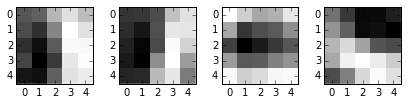

In [20]:
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
rcParams['figure.figsize'] = (6,10)


pesos_1 = capa_conv_1.W.get_value()
print pesos_1.shape
print pesos_1
print pesos_1[0,0,:,:]
print np.amax(pesos_1)
print np.amin(pesos_1)

fig  = plt.figure()
num_filt_1 = pesos_1.shape[0]
gs = gridspec.GridSpec(1, num_filt_1)
ax = [plt.subplot(gs[i]) for i in range(num_filt_1)]
gs.update(hspace=0)
gs.tight_layout(fig, h_pad=-2.0,w_pad=0.0)
for i in range(num_filt_1):
    ax[i].imshow(pesos_1[i,0,:,:], cmap = cm.Greys_r, interpolation = 'none')
    #ax[i].axis('off')

As we see, these are simple filters that try to extract edges or gradients in the images.

The following layers are more difficult to understand. In the second layer, we have 8 filters for each of the eight filtered images of the previous layer:

In [21]:
pesos_2 = capa_conv_2.W.get_value()
print pesos_2.shape
pesos_2[:,0,:,:]
max_w = np.amax(pesos_2)
min_w = np.amin(pesos_2)
print min_w, max_w

(10, 4, 5, 5)
-0.348804445223 0.268361577087


For example, we extract the weights of the first filter for the filtered data of the first previous layer:

In [22]:
W_1 = pesos_2[0,0,:,:]
np.set_printoptions(suppress = True)
print W_1.shape
print W_1[:,:]

(5, 5)
[[ 0.07091217 -0.01773565 -0.00585395  0.02022882  0.01560204]
 [ 0.09713439 -0.01917026 -0.01003876  0.01377542  0.00830648]
 [ 0.13848266  0.02095497 -0.01348152 -0.00238621 -0.00223248]
 [ 0.09541082  0.03981987  0.01514193 -0.00171983 -0.00427593]
 [ 0.05743114  0.03123816  0.01792667 -0.00941712 -0.01108443]]


4 10


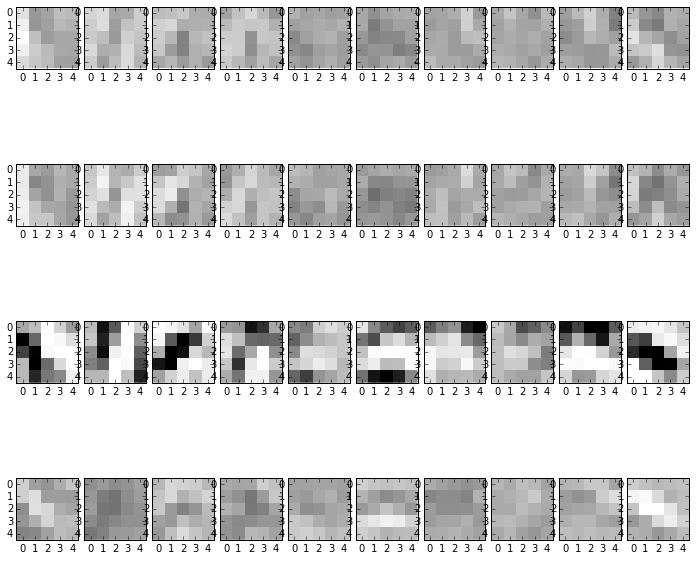

In [23]:
rcParams['figure.figsize'] = (10, 10)

fig  = plt.figure()
num_filt_2 = pesos_2.shape[0]
gs = gridspec.GridSpec(num_filt_1, num_filt_2, wspace=0.0,hspace=0.0)
print num_filt_1, num_filt_2
ax = [plt.subplot(gs[i]) for i in range(num_filt_1*num_filt_2)]
gs.update(hspace=5)
gs.tight_layout(fig, h_pad=-7.0,w_pad=-2.0)
for i in range(num_filt_1):
    for j in range(num_filt_2):
        ax[num_filt_2*i+j].imshow(pesos_2[j,i,:,:], cmap = cm.Greys_r, clim=(min_w/2,max_w/2),interpolation='none')
        #ax[num_filt_2*i+j].axis('off')

### Plots of the activations

(2007, 4, 24, 24)
(4, 24, 24)
(2007, 10, 4, 4)


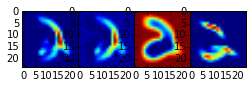

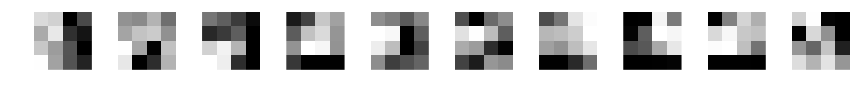

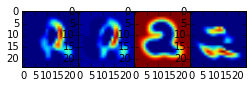

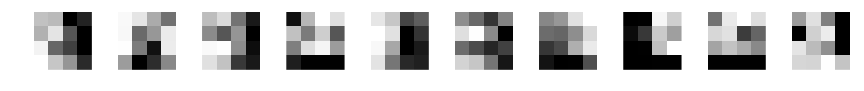

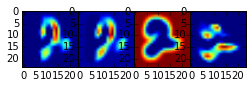

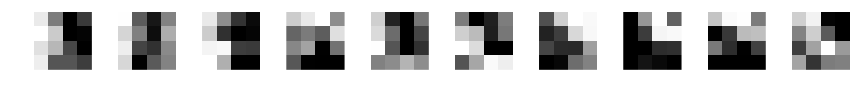

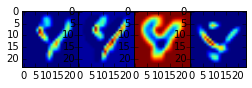

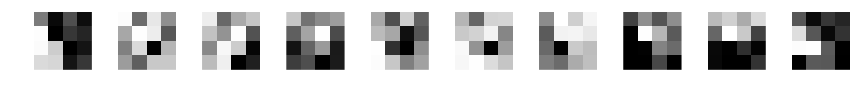

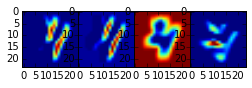

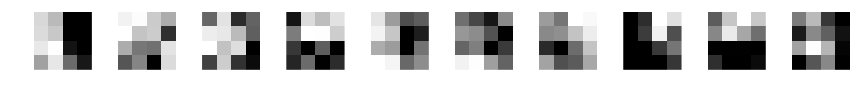

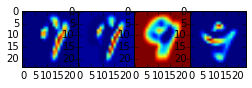

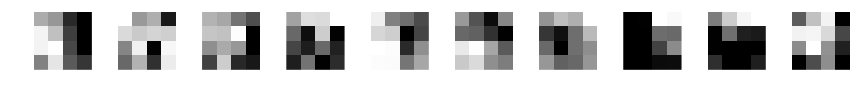

In [24]:

salida_c1 = lasagne.layers.get_output(capa_conv_1, deterministic=True)
predict_c1 = theano.function([entrada_var], salida_c1)
preds_c1 = predict_c1(x_test[:,:,:,:])
print preds_c1.shape

print preds_c1[11,:,:,:].shape

salida_c2 = lasagne.layers.get_output(capa_pool_2, deterministic=True)
predict_c2 = theano.function([entrada_var], salida_c2)
preds_c2 = predict_c2(x_test[:,:,:,:])
print preds_c2.shape
max_w = np.amax(preds_c2[:,:,:,:])
min_w = np.amin(preds_c2[:,:,:,:])

def plot_activ(n_fig):
    #rcParams['figure.figsize'] = (2, 3)
    #plt.imshow(x_test[n_fig,0,:,:], cmap = cm.Greys_r)
    rcParams['figure.figsize'] = (4,4)
    ## 1a capa
    fig  = plt.figure()
    gs = gridspec.GridSpec(1, 4, wspace=0.0,hspace=0.0)
    ax = [plt.subplot(gs[i]) for i in range(4)]
    for i in range(4):
        ax[i].imshow(preds_c1[n_fig,i,:,:])
    # 2a capa
    rcParams['figure.figsize'] = (12,6)
    fig  = plt.figure()
    gs = gridspec.GridSpec(1, 10, wspace=0.0,hspace=0.0)
    ax = [plt.subplot(gs[i]) for i in range(10)]
    gs.tight_layout(fig, h_pad=-0.0,w_pad=-0.0)

    for i in range(10):
        max_w = np.amax(preds_c2[n_fig,i,:,:])
        min_w = np.amin(preds_c2[n_fig,i,:,:])
        ax[i].imshow(preds_c2[n_fig,i,:,:], cmap = cm.Greys_r, interpolation='none',
                     clim=(min_w,max_w))
        ax[i].axis('off')

plot_activ(11)
plot_activ(20)
plot_activ(58)
plot_activ(13)
plot_activ(62)
plot_activ(65)

### Dropout regularization

Furthermore, we can perform dropout regularization. This has the effect of picking a random proportion of the inputs and putting their coefficients as zero (in training). This is a kind of regularization that tries to control coadaptation of neurons (some depend on others strongly to give the correct output).

In [25]:
entrada_var = T.tensor4('entradas')
respuesta_var = T.ivector('respuesta')

capa_entrada = layers.InputLayer((n_lote, 1, im_ancho, im_alto), entrada_var)

np.random.seed(108783)

capa_conv_1 = layers.Conv2DLayer(
    capa_entrada,
    num_filters = 6,
    filter_size = (5,5),
    nonlinearity = rectify)

capa_pool_1 = layers.MaxPool2DLayer(
    capa_conv_1,
    pool_size = (2,2)
)

capa_dp_1 = layers.DropoutLayer(capa_pool_1, p=0.5)

capa_conv_2 = layers.Conv2DLayer(
    capa_pool_1,
    num_filters = 20,
    filter_size = (5,5),
    nonlinearity = rectify
)

capa_pool_2 = layers.MaxPool2DLayer(
    capa_conv_2,
    pool_size = (2,2)
)

capa_dp_2 = layers.DropoutLayer(capa_pool_2, p=0.5)

capa_oculta = layers.DenseLayer(
    capa_dp_2,
    num_units = 150,
    nonlinearity = rectify
)

capa_dropout = layers.DropoutLayer(capa_oculta, p=0.5)

capa_salida = layers.DenseLayer(
    capa_dropout,
    num_units = 10,
    nonlinearity = softmax
)


In [26]:
pred_2 = lasagne.layers.get_output(capa_salida)
perdida_2 = lasagne.objectives.categorical_crossentropy(pred_2, respuesta_var)
perdida_2 = perdida_2.mean()
reg_layers = {capa_oculta:0.001,capa_conv_1:0.001, capa_conv_2:0.001, 
              capa_salida:0.001}
l2_penalty = regularize_layer_params_weighted(reg_layers, l2)
perdida_reg_2 = perdida_2 + l2_penalty

prueba_pred = lasagne.layers.get_output(capa_salida, deterministic=True)
perdida_pr_2 = lasagne.objectives.categorical_crossentropy(prueba_pred, respuesta_var)
perdida_pr_2 = perdida_pr_2.mean()
test_acc = T.mean(T.eq(T.argmax(prueba_pred, axis=1), respuesta_var))

params_2 =lasagne.layers.get_all_params(capa_salida, trainable = True)
updates_2 = lasagne.updates.nesterov_momentum(perdida_reg_2, params_2, learning_rate=0.01,
                                              momentum=0.9)

entrena_fn_2 = theano.function([entrada_var, respuesta_var], perdida_2, updates=updates_2)
valid_fn_2 = theano.function([entrada_var, respuesta_var], [perdida_pr_2, test_acc])

ajustar_red(400, x_train,y_train, x_test,y_test, entrena_fn_2, valid_fn_2)

Epoch 1 of 400 took 2.632s
  training loss:		2.2849
  test loss:     		2.1509
  accuracy on test: 		29.90 %
Epoch 2 of 400 took 1.937s
  training loss:		2.0721
  test loss:     		1.7719
  accuracy on test: 		34.90 %
Epoch 3 of 400 took 1.930s
  training loss:		1.6970
  test loss:     		1.2112
  accuracy on test: 		69.35 %
Epoch 4 of 400 took 1.924s
  training loss:		1.2492
  test loss:     		0.7517
  accuracy on test: 		82.85 %
Epoch 5 of 400 took 2.212s
  training loss:		0.9025
  test loss:     		0.5303
  accuracy on test: 		85.85 %
Epoch 6 of 400 took 2.627s
  training loss:		0.7055
  test loss:     		0.4217
  accuracy on test: 		88.35 %
Epoch 7 of 400 took 2.622s
  training loss:		0.5918
  test loss:     		0.3594
  accuracy on test: 		89.45 %
Epoch 8 of 400 took 2.621s
  training loss:		0.5112
  test loss:     		0.3222
  accuracy on test: 		90.90 %
Epoch 9 of 400 took 2.624s
  training loss:		0.4675
  test loss:     		0.2939
  accuracy on test: 		91.50 %
Epoch 10 of 400 took 2.623s


And again we can understand the operation of the network by checking the weights. For the first convolution layer:

(6, 1, 5, 5)


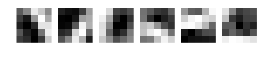

In [27]:
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
pesos_1 = capa_conv_1.W.get_value()
print pesos_1.shape

rcParams['figure.figsize'] = (4,4)
fig  = plt.figure()
num_filt_1 = pesos_1.shape[0]
gs = gridspec.GridSpec(1, num_filt_1)
ax = [plt.subplot(gs[i]) for i in range(num_filt_1)]
gs.update(hspace=0)
gs.tight_layout(fig, h_pad=-2.0,w_pad=-2.0)
for i in range(num_filt_1):
    ax[i].imshow(pesos_1[i,0,:,:], cmap = cm.Greys_r, interpolation = 'none')
    ax[i].axis('off')

### References

- [Lasagne documentation](http://lasagne.readthedocs.org)
- [Dropout regularization](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf)
- [Mini-batch SGD](https://class.coursera.org/neuralnets-2012-001/lecture/59)
- [Momentum methods to improve SGD](https://class.coursera.org/neuralnets-2012-001/lecture/63)
- [Visualizing and understanding Convolutional Networks](https://www.cs.nyu.edu/~fergus/papers/zeilerECCV2014.pdf)